<a href="https://colab.research.google.com/github/sowmyarajesh/PythonMachingLearning/blob/main/Mammographic_Mass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mammographic Mass Data Set

Dataset Link:  https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass

Download the data from the above link. Update the code to the correct path of the csv file. 

Models listed here are with optimal parameters after multiple experiments.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## import Data 

In [3]:
MMDataset = pd.read_csv('sample_data/mammographic_masses.csv')

## EDA 

In [4]:
MMDataset.shape

(961, 6)

In [5]:
MMDataset.head(10)

,BI-RADS,age,shape,margin,density,severity
0,5,67,3,5,3,1
1,4,43,1,1,?,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,?,1
5,4,65,1,?,3,0
6,4,70,?,?,3,0
7,5,42,1,?,3,0
8,5,57,1,5,3,1
9,5,60,?,5,1,1


In [6]:
MMDataset['severity'].value_counts()

0    516
1    445
Name: severity, dtype: int64

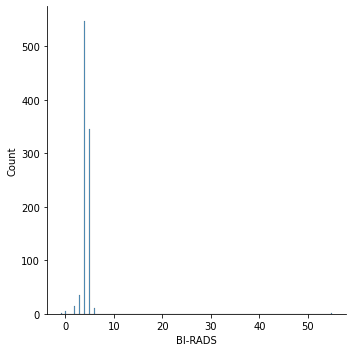

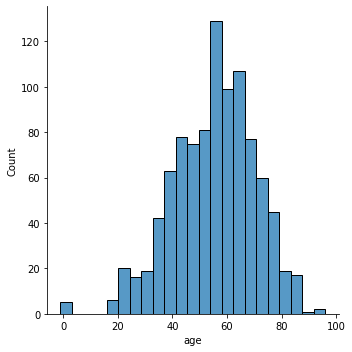

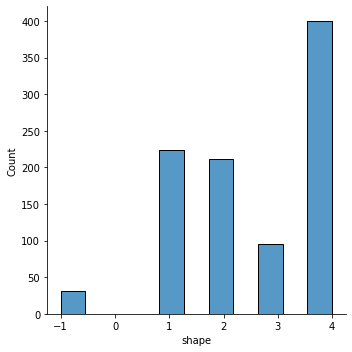

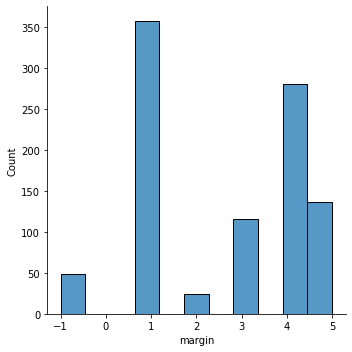

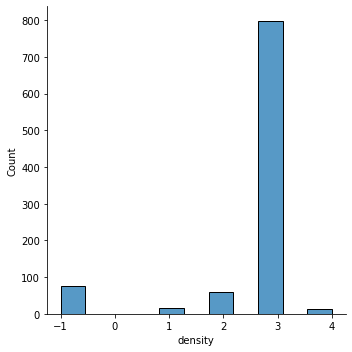

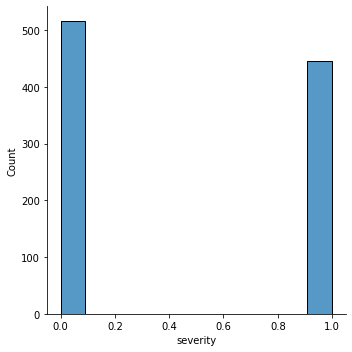

In [28]:
for col in MMDataset.columns:
  sns.displot(x=col, data=MMDataset)
  plt.show()

In [8]:
# understand the data type of the data points
# It is good to have all the features to the same datatype - recommended
MMDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   BI-RADS   961 non-null    object
 1   age       961 non-null    object
 2   shape     961 non-null    object
 3   margin    961 non-null    object
 4   density   961 non-null    object
 5   severity  961 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 45.2+ KB


In [9]:
MMDataset.replace(to_replace='?',value=-1,inplace=True)
MMDataset=MMDataset.astype(np.float64)

In [10]:
# checking for missing values
MMDataset.isnull().sum()


BI-RADS     0
age         0
shape       0
margin      0
density     0
severity    0
dtype: int64

Statistical summary of the data - Descriptive Statistics

In [11]:
MMDataset.describe()

,BI-RADS,age,shape,margin,density,severity
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000
mean,4.337149,55.193548,2.601457,2.606660,2.601457,0.463059
std,1.797789,15.003819,1.388329,1.736651,1.117269,0.498893
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,4.000000,45.000000,1.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [12]:
MMDataset['severity'].value_counts()

0.0    516
1.0    445
Name: severity, dtype: int64

In [13]:
# MMDataset.describe(exclude=[np.number])

Analysis for outliers

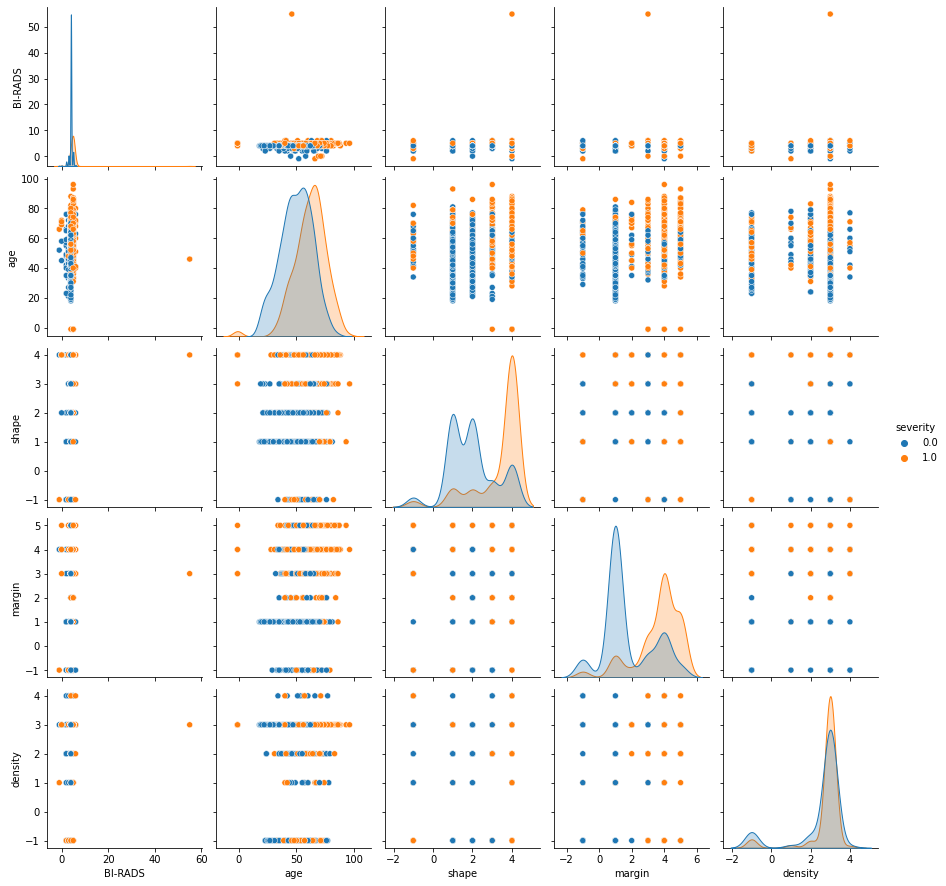

In [14]:
sns.pairplot(MMDataset, hue='severity')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

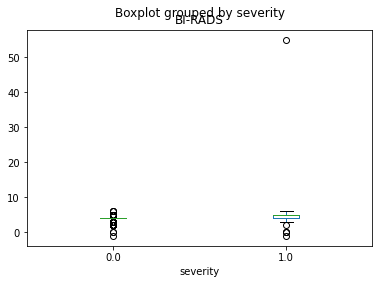

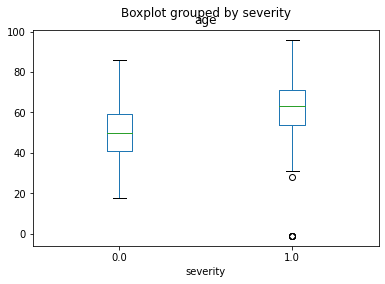

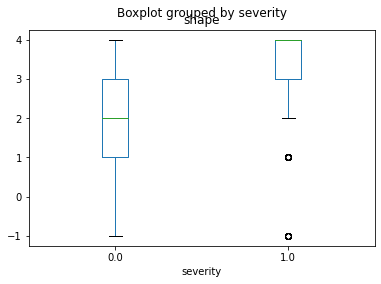

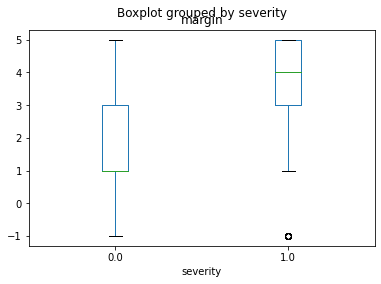

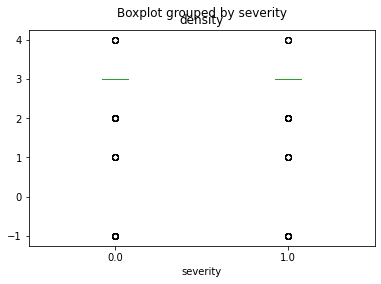

In [15]:
for col in MMDataset.columns:
  if col !='severity':
    MMDataset.boxplot(by ='severity', column =[col], grid = False)

check correlations

In [16]:
MMDataset.corr()

,BI-RADS,age,shape,margin,density,severity
BI-RADS,1.000000,0.083812,0.191616,0.159627,0.059187,0.228760
age,0.083812,1.000000,0.281148,0.326222,0.094833,0.393531
shape,0.191616,0.281148,1.000000,0.614080,0.164770,0.501339
margin,0.159627,0.326222,0.614080,1.000000,0.203657,0.544681
density,0.059187,0.094833,0.164770,0.203657,1.000000,0.116523
severity,0.228760,0.393531,0.501339,0.544681,0.116523,1.000000


## Preprocessing Data

In [17]:
MMDataset['BI-RADS'].value_counts()

 4.0     547
 5.0     345
 3.0      36
 2.0      14
 6.0      11
 0.0       5
-1.0       2
 55.0      1
Name: BI-RADS, dtype: int64

In [18]:
refinedDF = MMDataset[(MMDataset['BI-RADS']!=55.0) &(MMDataset['BI-RADS']!=-1)]
refinedDF = refinedDF[(refinedDF['age']>0)]

In [43]:
X = refinedDF.copy()
X.drop(columns=['severity'], inplace=True)
y = refinedDF['severity']
XTrain, XTest, yTrain, yTest = train_test_split(X.values, y.values,test_size=0.2, random_state=23,shuffle=True)
XTrain.shape, XTest.shape

((762, 5), (191, 5))

## Model building

In [44]:
from sklearn.svm import SVC
svc_m = SVC()
svc_m.fit(XTrain,yTrain)
svc_m.score(XTrain,yTrain)

0.7939632545931758

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf_m = RandomForestClassifier(n_estimators=50,criterion='entropy',warm_start=True)
rf_m.fit(XTrain,yTrain)
rf_m.score(XTrain,yTrain)

0.9448818897637795

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt_m = DecisionTreeClassifier(random_state=48)
dt_m.fit(XTrain,yTrain)
dt_m.score(XTrain,yTrain)

0.9461942257217848

In [49]:
b_m = rf_m
y_pred =b_m.predict(XTest)
print(metrics.accuracy_score(yTest,y_pred))
print(metrics.confusion_matrix(yTest,y_pred))

0.8272251308900523
[[87 17]
 [16 71]]
